In the next exercise you will use the accounts.csv dataset. This dataset contains account details
of bank clients, and the target variable y is binary (‘has the client subscribed a term deposit?’).
Select the first 8 features and remove duplicates and null values.
Hint: You can use get_dummies() to change the feature type (e.g. pd.get_dummies(data,
drop_first=True)).

1. Normalize the data using MinMaxScaler:

a. [4v] Using sklearn, apply k-means clustering (without targets) on the normalized
data with k={2,3,4,5,6,7,8}, max_iter=500 and random_state=42. Plot the
different sum of squared errors (SSE) using the _inertia attribute of k-means
according to the number of clusters.

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\clust

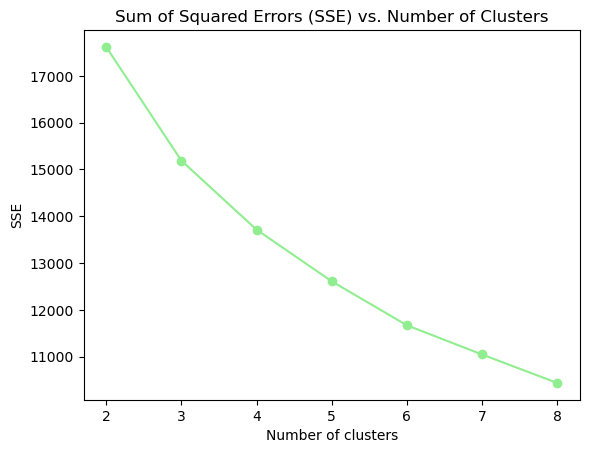

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

df = pd.read_csv('accounts.csv')

# Select the first 8 columns
df_selected = df.iloc[:, :8]

# Remove duplicates
df_clean = df_selected.drop_duplicates().dropna()

df_encoded = pd.get_dummies(df_clean, drop_first=True)

scaler = MinMaxScaler()
#Fit and transform the encoded Dataframe to normalize the data
df_normalized = pd.DataFrame(scaler.fit_transform(df_encoded), columns=df_encoded.columns)

sse = []
for k in range(2, 9):
    # Create KMeans model with the current number of clusters
    kmeans = KMeans(n_clusters=k, max_iter=500, random_state=42)
    # Fit the model to the data
    kmeans.fit(df_normalized)
    # Append the SSE (inertia) to the list
    sse.append(kmeans.inertia_) 

plt.plot(range(2, 9), sse, color= 'lightgreen', marker='o')
plt.title('Sum of Squared Errors (SSE) vs. Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()


2. Normalize the data using StandardScaler:

a. [1v] Apply PCA to the data. How much variability is explained by the top 2
components?

In [5]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('accounts.csv')

df_selected = df.iloc[:, :8]

df_clean = df_selected.drop_duplicates().dropna()

df_encoded = pd.get_dummies(df_clean, drop_first=True)

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded)

# Initialize PCA to reduce the dimensionality to 2 components
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_scaled)

# Calculate the total variability explained by the first two principal components
variability = sum(pca.explained_variance_ratio_)
print("Top 2 components:", variability)


Top 2 components: 0.22755004081398517


b. [1v] Apply k-means clustering with k=3 and random_state=42 (all other
arguments as default) and use the original 8 features. Next, provide a scatterplot
according to the first 2 principal components. Can we clearly separate the clusters?
Justify.

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


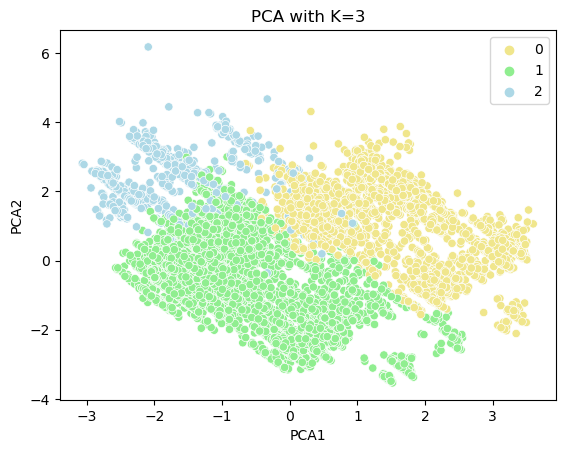

In [6]:
colors = ['#F0E68C', 'lightgreen', 'lightblue']

# Perform KMeans clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42, max_iter= 500)
clusters = kmeans.fit_predict(df_scaled)

color = [colors[i] for i in clusters]

# Create a scatter plot of the PCA components, colored by the cluster assignments
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=clusters, palette=colors)
plt.title('PCA with K=3')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

c. [2v] Plot the cluster conditional features of the frequencies of “job” and ”education”
according to the clusters obtained in the previous question (2b.). Use sns.displot
(see Data Exploration notebook), with multiple="dodge", stat='density',
shrink=0.8 and common_norm=False. Describe the main differences between the
clusters in no more than half a page.

Variance by 2 main components: 22.76%


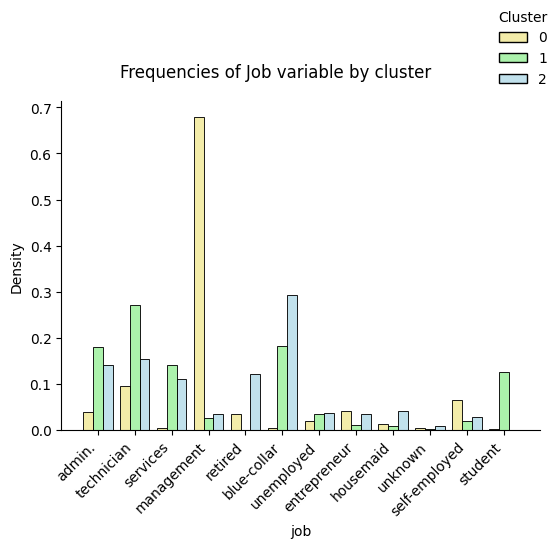

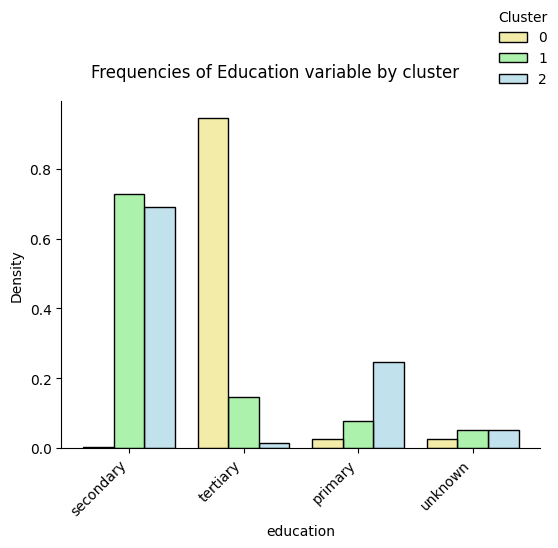

In [58]:
df_selected = df.iloc[:, :8]

df_selected[['job', 'education']] = df[['job', 'education']]

df_clean = df_selected.drop_duplicates().dropna()

df_encoded = pd.get_dummies(df_clean, drop_first=True)

scaler = StandardScaler()
df_normalized = scaler.fit_transform(df_encoded)

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_normalized)

# Calculate and print the explained variance of the 2 principal components
explained_variance = pca.explained_variance_ratio_
print(f"Variance by 2 main components: {sum(explained_variance) * 100:.2f}%")

# Perform KMeans clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(df_pca)

df_clean['Cluster'] = clusters

colors = ['#F0E68C', 'lightgreen', 'lightblue']

g = sns.displot(df_clean, x='job', hue='Cluster', multiple='dodge', stat='density', shrink=0.8, common_norm=False, palette=colors)
g.fig.suptitle('Frequencies of Job variable by cluster')
g.set_xticklabels(rotation=45, ha='right')
g._legend.set_bbox_to_anchor((1, 1))
plt.tight_layout()
plt.show()

g2 = sns.displot(df_clean, x='education', hue='Cluster', multiple='dodge', stat='density', shrink=0.8, common_norm=False, palette=colors)
g2.fig.suptitle('Frequencies of Education variable by cluster')
g2.set_xticklabels(rotation=45, ha='right')
g2._legend.set_bbox_to_anchor((1, 1))
plt.tight_layout()
plt.show()